<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Two_Edge_Connected_Graph_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two-Edge-Connected Graph

You're given a list of `edges` representing an unweighted and undirected graph. Write a function that returns a boolean representing whether the given graph is two-edge-connected.

A graph is connected if, for every pair of vertices in the graph, there's a path of one or more edges connecting the given vertices. A graph that isn't connected is said to be disconnected.

A graph is two-edge-connected if, for every one of its `edges`, the edge's removal from the graph doesn't cause the graph to become disconnected. If the removal of any single edge disconnects the graph, then it isn't two-edge-connected. If the given graph is already disconnected, then it also isn't two-edge-connected. An empty graph is considered two-edge-connected.

The input list is what's called an adjacency list, and it represents a graph. The number of vertices in the graph is equal to the length of `edges`, where each index` i` in `edges` contains vertex `i`'s outbound edges, in no particular order. Each outbound edge is represented by a positive integer that denotes an index (a destination vertex) in the list that this vertex is connected to. Note that these edges are undirected, meaning that you can travel from a particular vertex to its destination and from the destination back to that vertex. Since these edges are undirected, if vertex `i` has an outbound edge to vertex `j`, then vertex `j` is guaranteed to have an outbound edge to vertex `i`. For example, an undirected graph with two vertices and one edge would be represented by the following adjacency list edges = `[[1], [0]]`.

Note that the input graph will never contain parallel edges (edges that share the same source and destination vertices). In other words, there will never be more than one edge that connects the same two vertices to each other.

Sample Input

```
edges = [
  [1, 2, 5],
  [0, 2],
  [0, 1, 3],
  [2, 4, 5],
  [3, 5],
  [0, 3, 4],
]
```



Sample Output

```
true 
```



In [1]:
# Time O(V + E)
# Space O(V)

def twoEdgeConnectedGraph(edges):
  if len(edges) == 0:
    return True

  node_ids = [None] * len(edges)
  start_vertex = 0
  
  lowlink, bridge_found = dfs_detect_bridge(start_vertex, None, 0, node_ids, edges)
  if bridge_found:
    return False
  return are_all_vertices_visited(node_ids)

def are_all_vertices_visited(node_ids):
  for node_id in node_ids:
    if node_id == None:
      return False
  return True

def dfs_detect_bridge(current_vertex, parent, current_node_id, node_ids, edges):
  bridge_found = False
  node_ids[current_vertex] = current_node_id

  lowlink = current_node_id

  for destination in edges[current_vertex]:
    if node_ids[destination] == None: # Not yet visit
      destination_lowlink, bridge_found = dfs_detect_bridge(destination, current_vertex, current_node_id + 1, node_ids, edges)
      lowlink = min(lowlink, destination_lowlink)
    elif destination != parent:
      lowlink = min(lowlink, node_ids[destination])

  # bridge detect
  if lowlink == current_node_id and parent != None:
    bridge_found = True

  return lowlink, bridge_found

In [2]:
edges = [
  [1, 2, 5],
  [0, 2],
  [0, 1, 3],
  [2, 4, 5],
  [3, 5],
  [0, 3, 4],
]
twoEdgeConnectedGraph(edges)

True

In [3]:
edges = [
    [1],
    [0, 2, 3],
    [1, 3],
    [1, 2]
  ]
twoEdgeConnectedGraph(edges)

False

In [4]:
edges = [
  [1, 2],
  [0, 2],
  [0, 1, 3, 5],
  [2, 4, 5],
  [3, 5],
  [2, 3, 4],
]
twoEdgeConnectedGraph(edges)

True

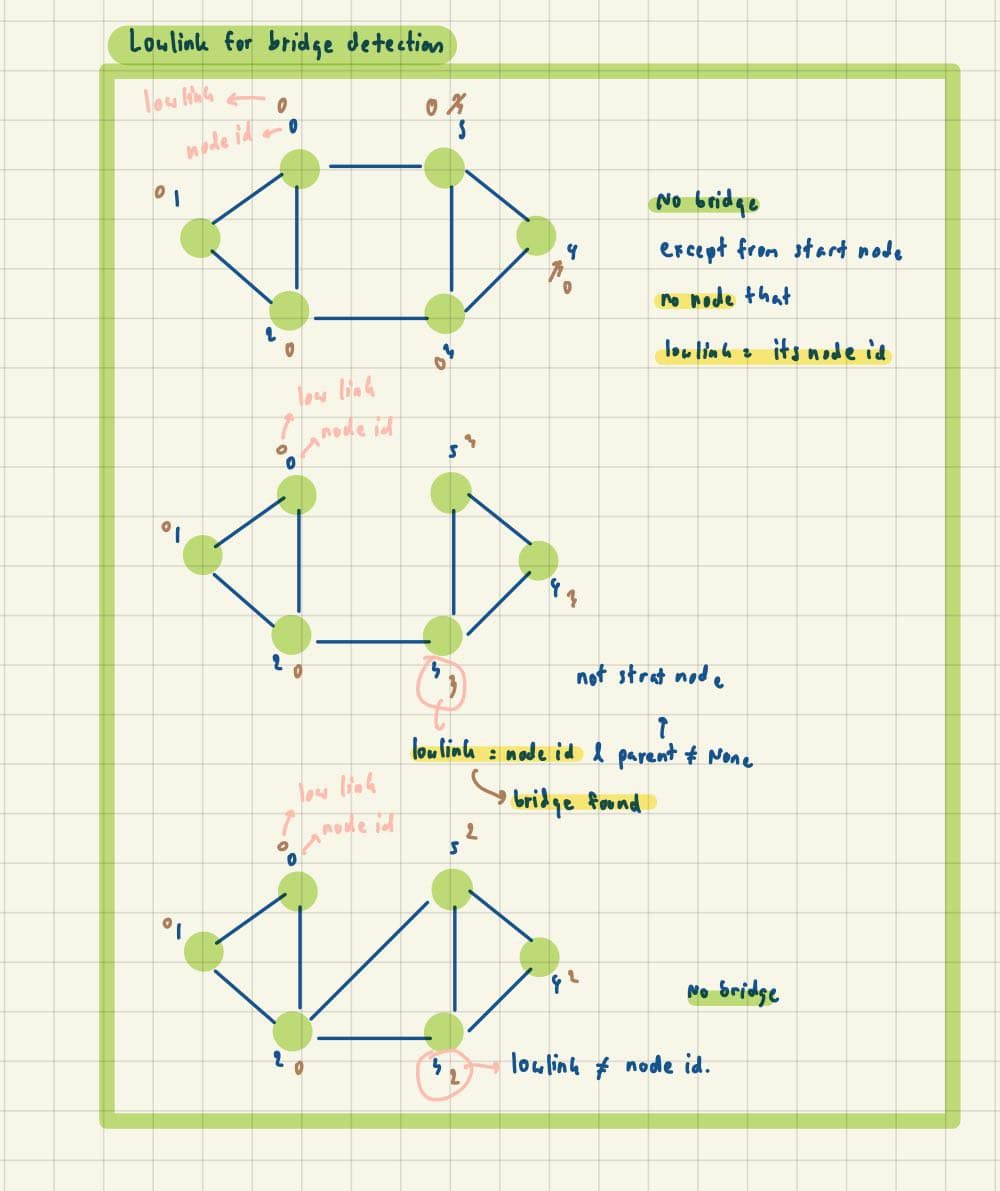